In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.shape

(8950, 18)

In [4]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# handle missing values

medianOfMinPayment = data['MINIMUM_PAYMENTS'].median()
data['MINIMUM_PAYMENTS'].fillna(value=medianOfMinPayment, inplace=True)

medianOfCreditLimit = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(value=medianOfCreditLimit, inplace=True)

In [6]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
del data['CUST_ID']
data.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [10]:
columnNames = np.array(data.columns)

In [11]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data))
X.columns = columnNames

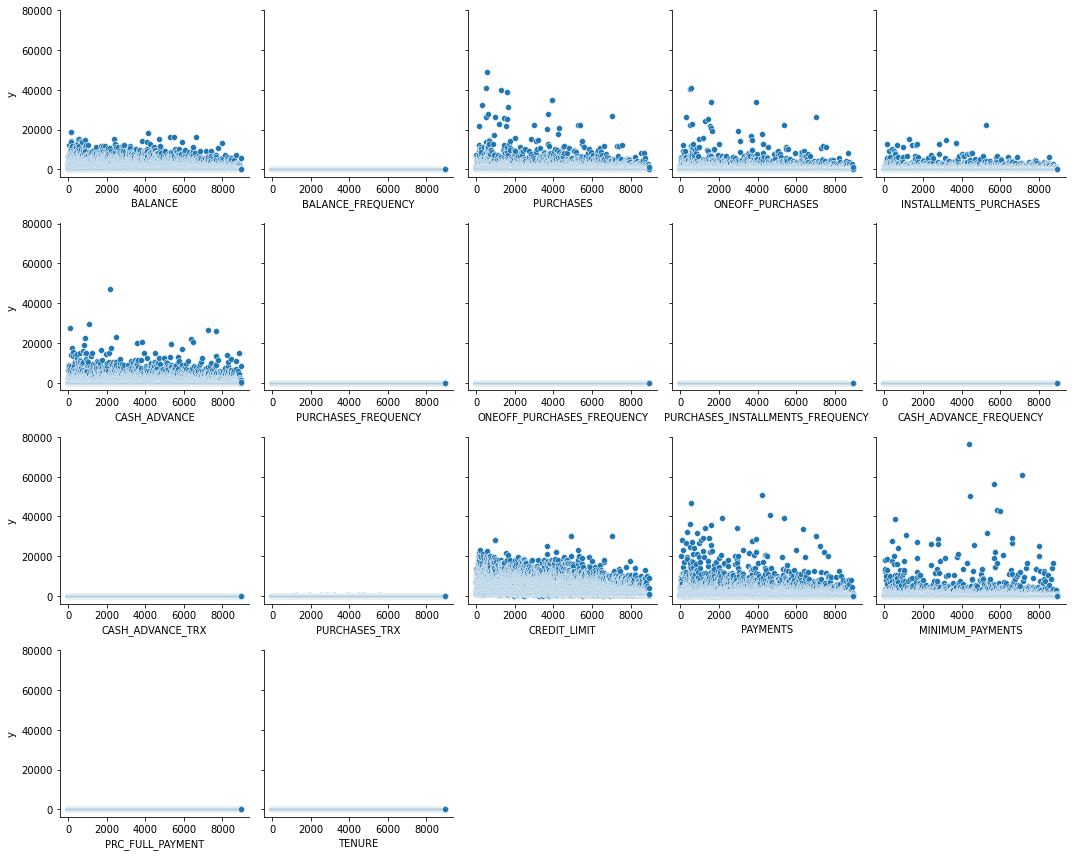

In [12]:
g = sns.FacetGrid(pd.DataFrame(columnNames), col=0, col_wrap=5, sharex=False)
for ax, xvar in zip(g.axes, np.array(columnNames)):
    sns.scatterplot(data=X[xvar], ax=ax)
    ax.set_xlabel(xvar)
    ax.set_ylabel("y")
g.tight_layout()

<AxesSubplot:>

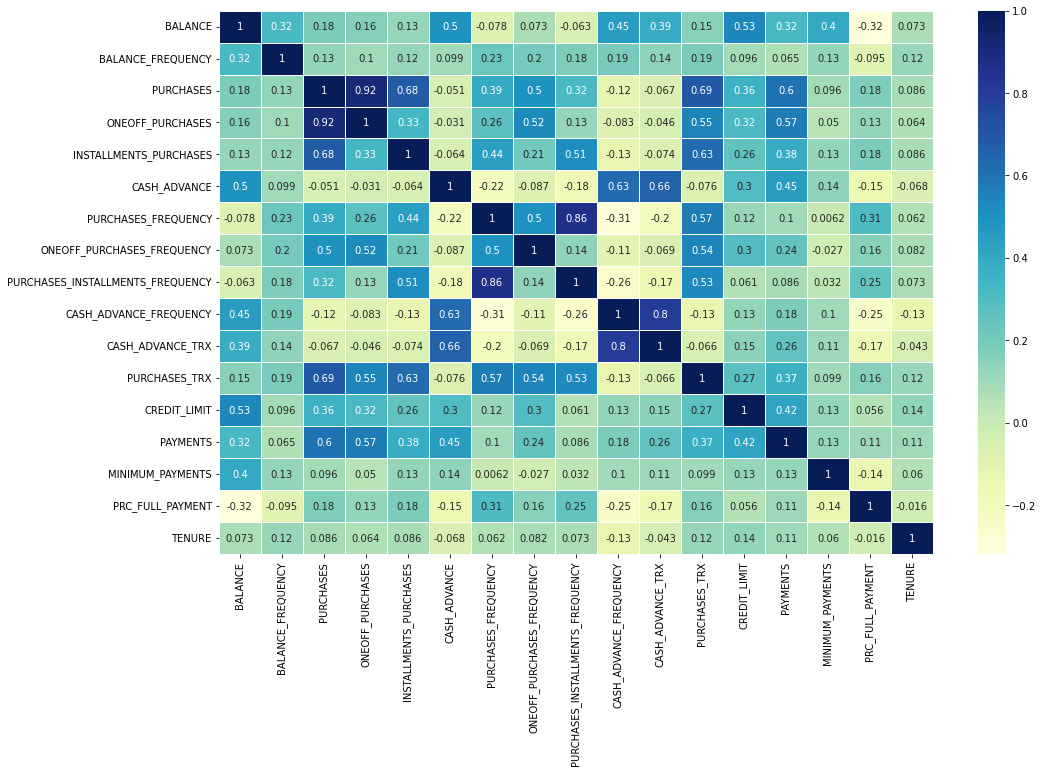

In [148]:
corr = X.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="YlGnBu", annot = True, linewidths=.5)

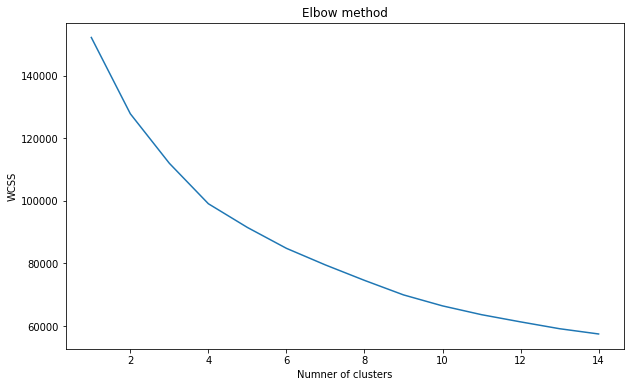

In [149]:
plt.figure(figsize=(10,6))
wcss=[]
for n in range(1,15):
    kmeans = KMeans(n_clusters=n, max_iter=700)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('Elbow method')
plt.xlabel('Numner of clusters')
plt.ylabel('WCSS')
plt.show()

In [150]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
y = kmeans.fit_predict(X)

In [155]:
kmeans.cluster_centers_

array([[-3.21688457e-01,  2.42573999e-01,  1.09043960e-01,
         9.26320814e-04,  2.55903798e-01, -3.66372614e-01,
         9.83720816e-01,  3.17152671e-01,  8.74137767e-01,
        -4.62598760e-01, -3.60303396e-01,  2.96985169e-01,
        -7.72513853e-02, -1.38501975e-01, -8.79808174e-02,
         3.95041454e-01,  5.77439285e-02],
       [ 1.45957148e+00,  3.84641678e-01, -2.34653983e-01,
        -1.64025403e-01, -2.53579197e-01,  1.68934647e+00,
        -5.04595569e-01, -2.13016767e-01, -4.49811274e-01,
         1.74727505e+00,  1.61864704e+00, -2.83389418e-01,
         8.38786820e-01,  6.04825432e-01,  4.96757651e-01,
        -4.06267712e-01, -9.75285009e-02],
       [-2.65115964e-01, -3.68721257e-01, -3.43158324e-01,
        -2.30450164e-01, -3.87814902e-01, -1.82333186e-01,
        -7.97824784e-01, -3.89369186e-01, -7.14296741e-01,
        -1.01435270e-01, -1.64611907e-01, -4.74996595e-01,
        -3.34110447e-01, -2.62144899e-01, -1.24752887e-01,
        -2.58932759e-01, -5.2

In [154]:
data_kmeans = data
data_kmeans['clusters'] = kmeans.labels_

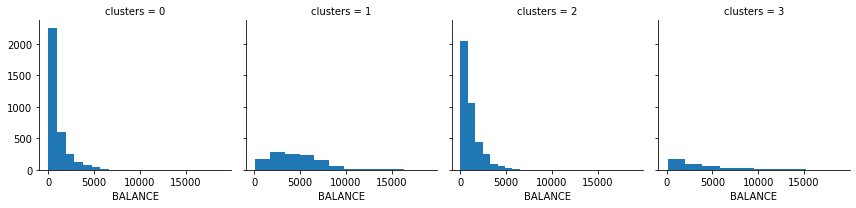

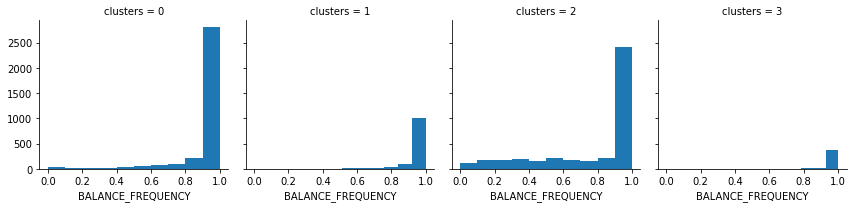

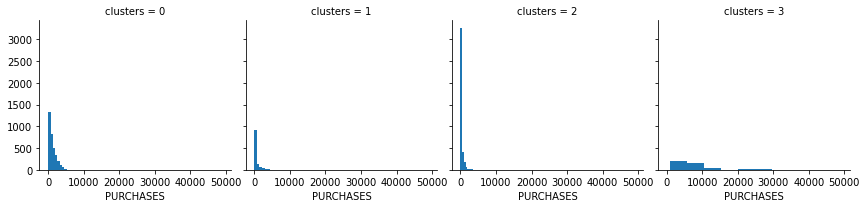

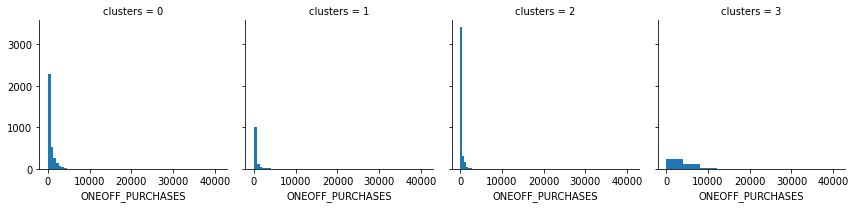

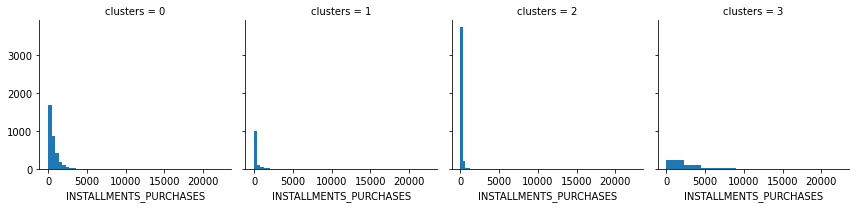

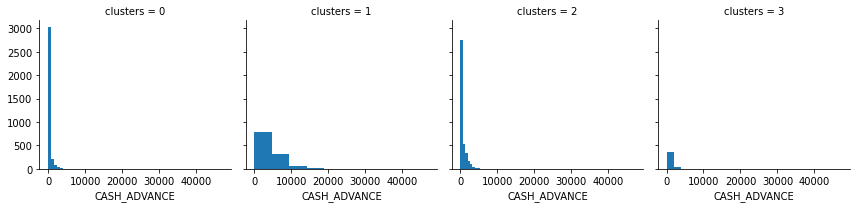

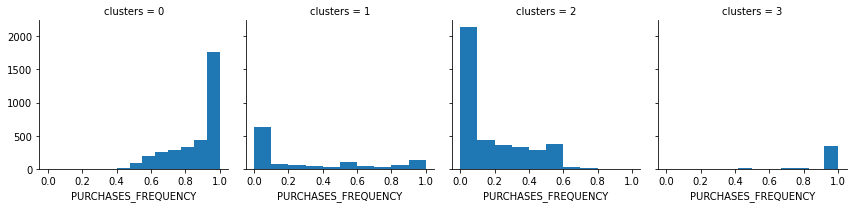

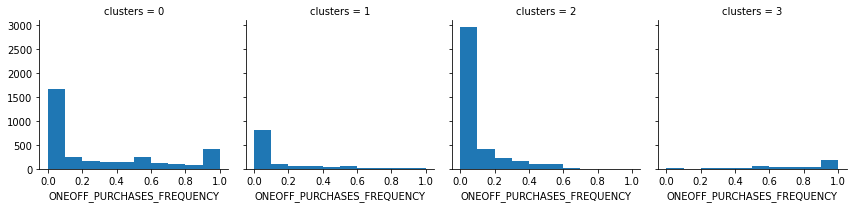

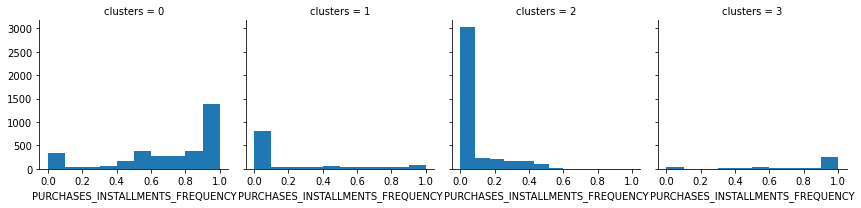

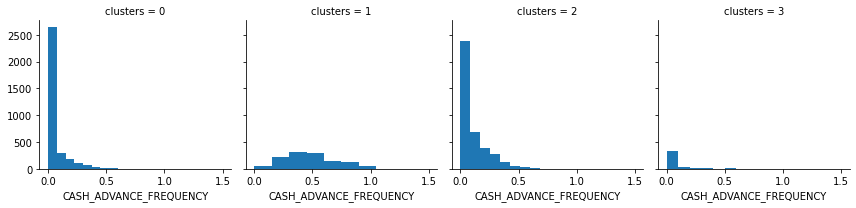

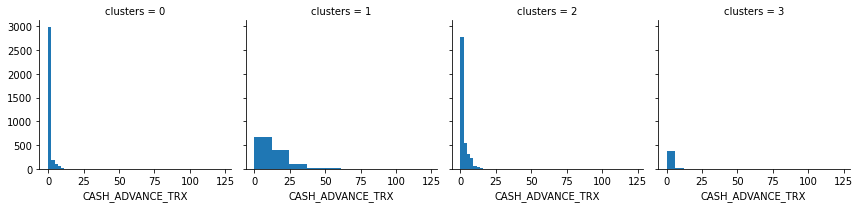

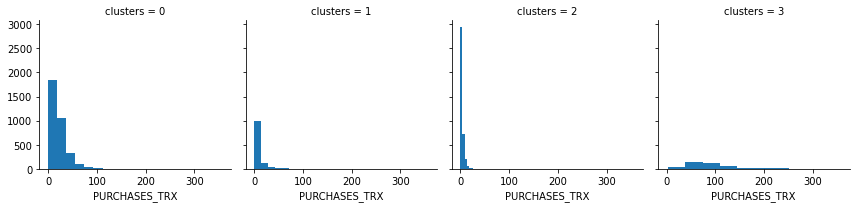

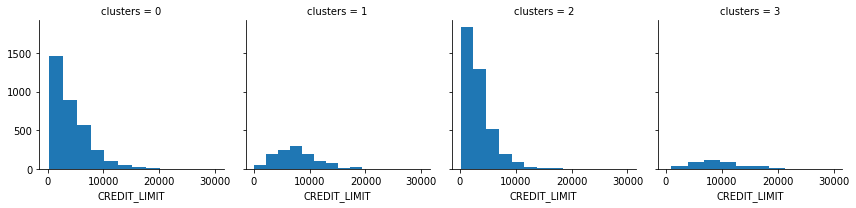

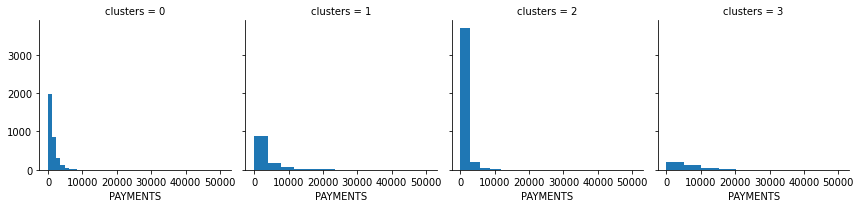

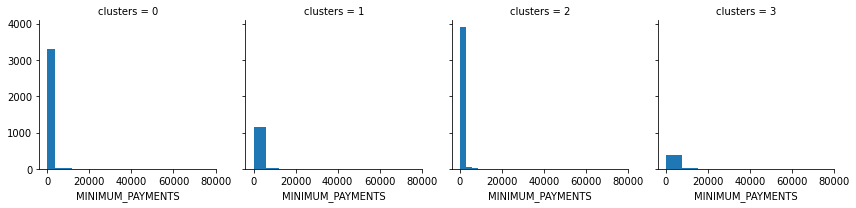

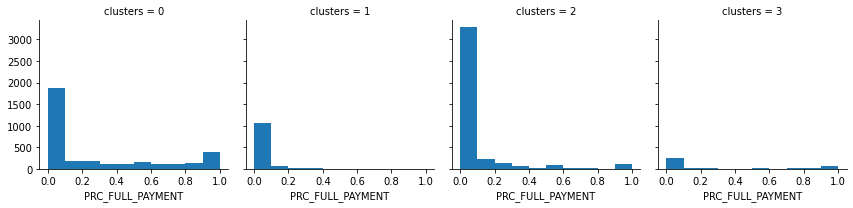

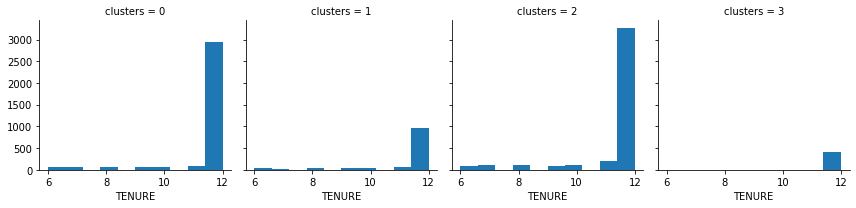

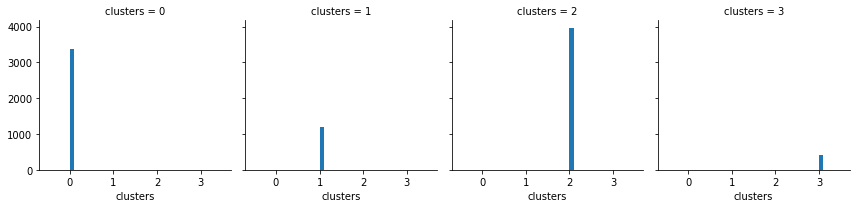

In [153]:
for c in data_kmeans:
    grid = sns.FacetGrid(data_kmeans, col='clusters')
    grid.map(plt.hist, c)